# Assignment (6th April) : Support Vector Machines - 1

### Q1. What is the mathematical formula for a linear SVM?

**ANS**: For a linear SVM, the objective is to find a hyperplane that separates classes with the maximum margin. The equation of a linear SVM hyperplane in two dimensions is:

\[
f(x) = w \cdot x + b = 0
\]

where:
- \( w \) is the weight vector,
- \( x \) is the input feature vector, and
- \( b \) is the bias term.

### Q2. What is the objective function of a linear SVM?

**ANS**: The objective function for a linear SVM aims to maximize the margin between the support vectors of the two classes while minimizing classification errors. The primal form of the objective function for a linear SVM is:

\[
\min_{w, b} \frac{1}{2} \| w \|^2
\]

subject to:

\[
y_i (w \cdot x_i + b) \geq 1
\]

for each training sample \((x_i, y_i)\), where \( y_i \) is the class label (either -1 or 1). This formulation is called a `hard-margin SVM`.

For a `soft-margin SVM` that allows some misclassification, we introduce a penalty term \( C \) and slack variables \( \xi_i \):

\[
\min_{w, b} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} \xi_i
\]

subject to:

\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]


### Q3. What is the kernel trick in SVM?

**ANS**: The `Kernel Trick` is a technique used in SVMs to transform input data into a higher-dimensional space to make it linearly separable. Instead of computing the transformation explicitly, SVMs use a kernel function \( K(x_i, x_j) \) to compute the dot product in the transformed space directly. Common kernels include:
- `Linear kernel`: \( K(x_i, x_j) = x_i \cdot x_j \)
- `Polynomial kernel`: \( K(x_i, x_j) = (x_i \cdot x_j + 1)^d \)
- `Radial basis function (RBF)`: \( K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2) \)


### Q4. What is the role of support vectors in SVM Explain with example.

**ANS**: Support vectors are the data points closest to the decision boundary (or hyperplane) in SVMs. They `determine the orientation and position of the hyperplane` and are critical in defining the margin. If any support vector is removed or changed, the decision boundary will adjust accordingly.

- `Example`: In a binary classification with linearly separable classes, the support vectors are the points directly on the edge of the margin. All other points in the dataset do not affect the position of the hyperplane.

### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?



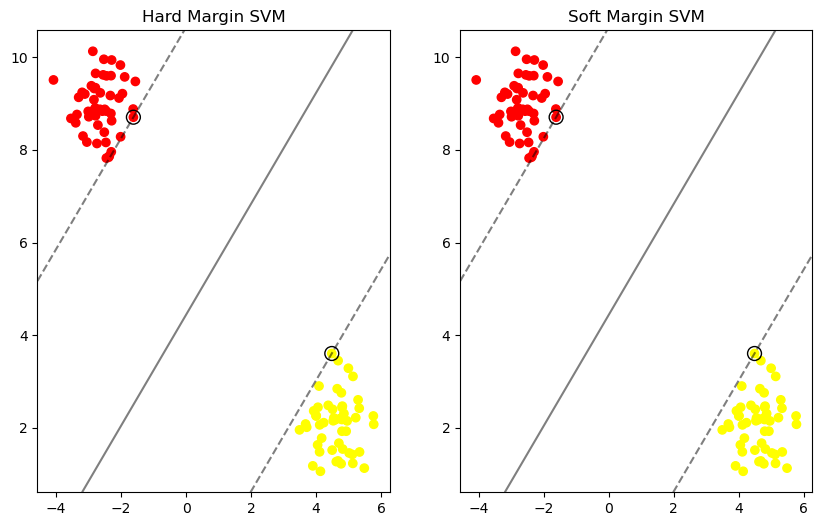

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=0.60)
plt.figure(figsize=(10, 6))

svm_hard = SVC(kernel='linear', C=1e5)  
svm_hard.fit(X, y)

svm_soft = SVC(kernel='linear', C=1)  
svm_soft.fit(X, y)

def plot_svm(model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)

plt.subplot(1, 2, 1)
plot_svm(svm_hard, "Hard Margin SVM")

plt.subplot(1, 2, 2)
plot_svm(svm_soft, "Soft Margin SVM")
plt.show()

### Q6. SVM Implementation through Iris dataset.
- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
- Train a linear SVM classifier on the training set and predict the labels for the testing set.
- Compute the accuracy of the model on the testing set.
- Plot the decision boundaries of the trained model using two of the features.
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy: 0.8


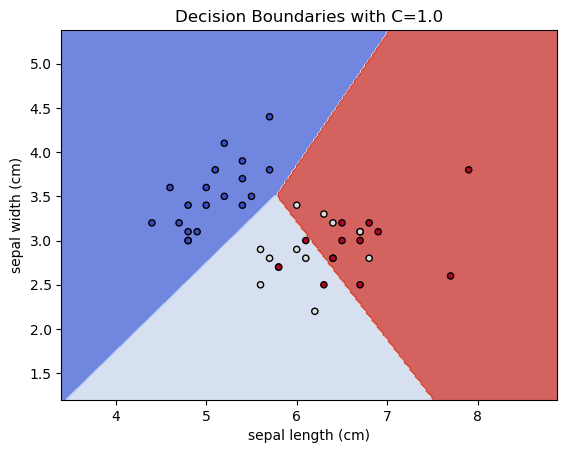

Accuracy with C=0.1: 0.8222222222222222


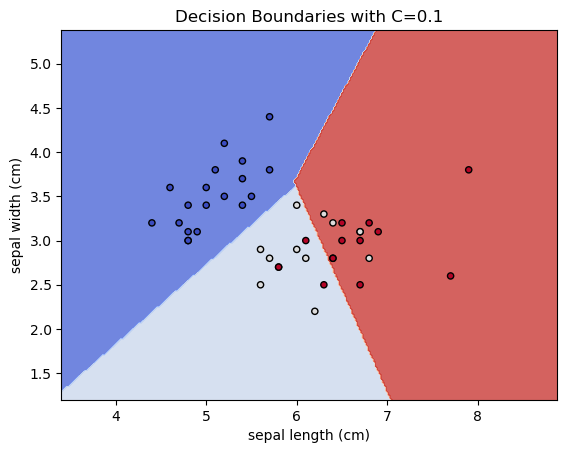

Accuracy with C=1: 0.8


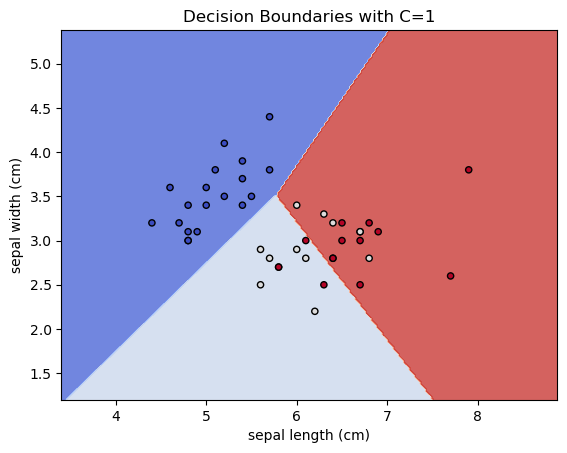

Accuracy with C=10: 0.8


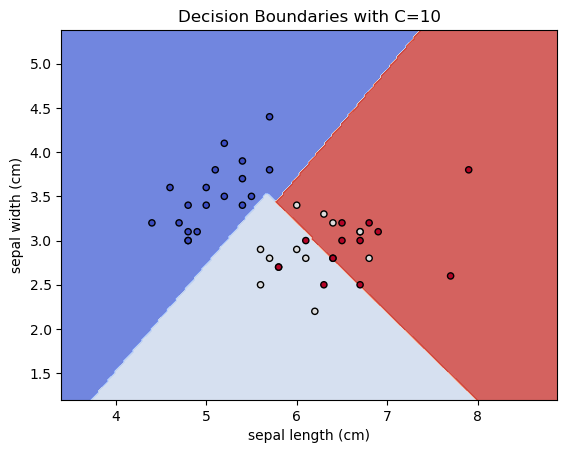

Accuracy with C=100: 0.8


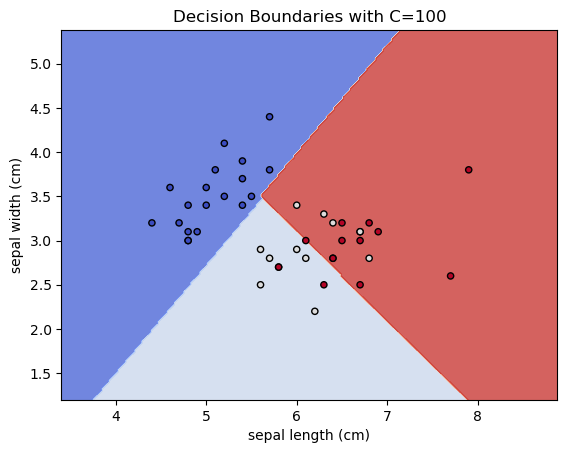

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

def plot_decision_boundaries(X, y, model, title):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()


plot_decision_boundaries(X_test, y_test, svm, "Decision Boundaries with C=1.0")

for C in [0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy}")
    plot_decision_boundaries(X_test, y_test, svm, f"Decision Boundaries with C={C}")
